In [1]:
import sys
# Add path of local module to system, ,diachr is located in parent directory 
# compared to this file
sys.path.append("..")
from diachr import BinomialInteractionModel

In [17]:
import os
import matplotlib.pyplot as plt
# This causes figures to be appear in the notebook
%matplotlib inline  

In [3]:
# Adjust path as necessary
# This should be a diachromatic extended interaction file
iefile = '/home/peter/data/diachromatic/JAV_MK_RALT_0.0019_enhanced_interaction_file_with_di_uii_and_uie.tsv.gz'
if not os.path.exists(iefile):
    raise FileNotFoundError("Could not find IE file")

In [11]:
# The constructor has defaults for each argument, change as desired
n_max=10000000
i_num=5000
p_value_cutoff=0.05

bim = BinomialInteractionModel(n_max=n_max, i_num=i_num, p_value_cutoff=p_value_cutoff)

n_max 10000000 <class 'int'>
self._n_max 10000000 <class 'int'>
[INFO] Looking for smallest number of read pairs n that yields a significant P-value with the given threshold of 0.05.
	[INFO] Smallest n: 5 read pairs (0.03125)
[INFO] Input parameters
	[INFO] --out_prefix: OUTPREFIX
	[INFO] --i-num: 5000
	[INFO] --n-max: 10000000
	[INFO] --p-value-cutoff: 0.05


<h2>We generate a plot of simulated data</h2>

In [12]:
signum_list, N_SIG_DICT_SIM = bim.count_simulated_interactions()

self_n_max 10000000 <class 'int'>
[INFO] Generating random numbers of simple and twisted read pairs ...
[INFO] Counting significant interactions for each n ...


In [14]:
y_list = []
for i in range(len(signum_list)):
    y = N_SIG_DICT_SIM.get(i,0)
    y_list.append(y)

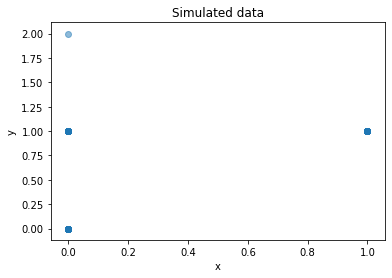

In [20]:
plt.scatter(signum_list, y_list, alpha=0.5)
plt.title('Simulated data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<h2>We generate a plot of empircal data</h2>

In [22]:
n_def_list, n_sig_list = bim.count_significant_empirical_interactions(eifile=iefile)

	[INFO] Processed 1000000 interactions ...
	[INFO] Processed 2000000 interactions ...
	[INFO] Processed 3000000 interactions ...
	[INFO] Processed 4000000 interactions ...
	[INFO] Processed 5000000 interactions ...
... done.
	[INFO] Processed 1000000 interactions ...
	[INFO] Processed 2000000 interactions ...
	[INFO] Processed 3000000 interactions ...
	[INFO] Processed 4000000 interactions ...
	[INFO] Processed 5000000 interactions ...
... done.


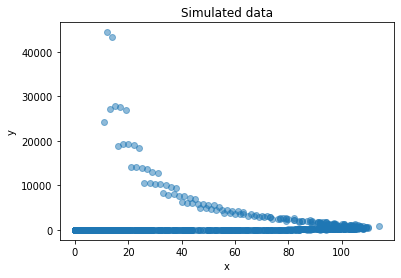

In [23]:
plt.scatter(n_def_list, n_sig_list, alpha=0.5)
plt.title('Simulated data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()